In [1]:
#Data Source: http://www.trumptwitterarchive.com/
#Code Source: https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/
#Vader Sentiment Analyzer: https://github.com/apanimesh061/VaderSentimentJava

## Imports

In [2]:
import pandas as pd
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
from collections import Counter
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('trumptweets.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36959 entries, 0 to 36958
Data columns (total 7 columns):
source            36959 non-null object
text              36958 non-null object
created_at        36955 non-null object
retweet_count     36955 non-null float64
favorite_count    36955 non-null object
is_retweet        36897 non-null object
id_str            36952 non-null float64
dtypes: float64(2), object(5)
memory usage: 2.0+ MB


In [5]:
#remove RT
df = df[df['is_retweet']=='false']

In [6]:
#remove duplicate Tweets
df = df.drop_duplicates(subset=["id_str"])

In [7]:
#set time
df['time'] = pd.to_datetime(df['created_at'], format='%m-%d-%Y %H:%M:%S')
df.index = df['time']

In [8]:
#Format
df['favorite_count'] = df['favorite_count'].astype(int)
df['retweet_count'] = df['retweet_count'].astype(int)

In [9]:
#Overview
df.sort_index().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34950 entries, 2009-05-04 18:54:25 to 2019-08-12 21:26:32
Data columns (total 8 columns):
source            34950 non-null object
text              34950 non-null object
created_at        34950 non-null object
retweet_count     34950 non-null int64
favorite_count    34950 non-null int64
is_retweet        34950 non-null object
id_str            34950 non-null float64
time              34950 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.4+ MB


## Sentiment Analysis

In [10]:
sia = SIA()
results = []

for line in list(df['text']):
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)
pd.set_option('max_colwidth', 320)
df_sent = pd.DataFrame(results)
df_sent = df_sent.sort_values(by='compound').reset_index()
del df_sent['index']
df_sent = df_sent.drop_duplicates()

In [11]:
pd.set_option("display.max_rows", 1000)

In [12]:
df_sent.head()

,neg,neu,pos,compound,headline
0,0.179,0.726,0.094,-0.9915,"It's disgraceful that the Obama Administration's first response was not to condemn attacks on our diplomatic (cont) http://t.co/NNyJdQGy,09-12-2012 19:40:04,186,28,false,245970051230998530\nTwitter Web Client,So Obama can host the Muslim Brotherhood Pres. Morsi in the White House http://t.co/WKhZV1Op but doesn't h..."
1,0.473,0.527,0.000,-0.9864,It is outrageous that Poisonous Synthetic Heroin Fentanyl comes pouring into the U.S. Postal System from China. We can and must END THIS NOW! The Senate should pass the STOP ACT – and firmly STOP this poison from killing our children and destroying our country. No more delay!
2,0.412,0.588,0.000,-0.9785,The Rigged Russian Witch Hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. All credibility is gone from this terrible Hoax and much more will be lost as it proceeds. No Collusion!
3,0.407,0.571,0.022,-0.9783,At the request of many I will be reviewing the case of a “U.S. Military hero” Major Matt Golsteyn who is charged with murder. He could face the death penalty from our own government after he admitted to killing a Terrorist bomb maker while overseas. @PeteHegseth @FoxNews
4,0.174,0.678,0.148,-0.9780,"@JoshinAk: @BillyHallowell I just bought one of his shirts for my wife's Christmas party. Great quality. Got lots of compliments! Great!,12-15-2013 00:11:30,10,18,false,412012000064335872\nTwitter for Android,The United States is experiencing the coldest weather in decades with vast amounts of snow blanketing many..."


In [13]:
df_sent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34771 entries, 0 to 34949
Data columns (total 5 columns):
neg         34771 non-null float64
neu         34771 non-null float64
pos         34771 non-null float64
compound    34771 non-null float64
headline    34771 non-null object
dtypes: float64(4), object(1)
memory usage: 1.6+ MB


In [14]:
df_sent.to_csv('trumptweets_sent.csv')

## Sentiment distribution

In [15]:
def dist(elem):
    if elem <-0.5:
        return 'neg'
    elif elem >0.5:
        return 'pos'
    else:
        return 'neu'
    
df_sent['Cat'] = df_sent['compound'].apply(dist)
df_sent['Cat'].value_counts()

neu    16181
pos    13720
neg     4870
Name: Cat, dtype: int64

## Plotting Sentiment

In [16]:
#merge the df_sent and df
df_ps = df.merge(df_sent, left_on='text', right_on='headline')
df_ps = df_ps[['time', 'compound', 'text', 'favorite_count', 'retweet_count']].copy()
df_ps.index = df_ps['time']
df_ps_neg = df_ps[df_ps['compound']<-0.5]
df_ps_pos = df_ps[df_ps['compound']>0.5]

In [17]:
df_ps_neg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4884 entries, 2019-08-08 04:20:03 to 2019-08-08 23:55:17
Data columns (total 5 columns):
time              4884 non-null datetime64[ns]
compound          4884 non-null float64
text              4884 non-null object
favorite_count    4884 non-null int64
retweet_count     4884 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 228.9+ KB


In [18]:
df_ps_pos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13806 entries, 2019-08-08 03:02:31 to 2019-08-08 14:38:16
Data columns (total 5 columns):
time              13806 non-null datetime64[ns]
compound          13806 non-null float64
text              13806 non-null object
favorite_count    13806 non-null int64
retweet_count     13806 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 647.2+ KB


### Average number of Likes per pos/neg Tweets

In [19]:
pd.DataFrame(df_ps_neg.resample('A')['favorite_count'].mean())

,favorite_count
time,
2011-12-31,96.136364
2012-12-31,410.591549
2013-12-31,261.801653
2014-12-31,335.450000
2015-12-31,2331.820396
2016-12-31,24342.573190
2017-12-31,92337.967213
2018-12-31,98733.383701
2019-12-31,101361.452297


In [20]:
pd.DataFrame(df_ps_pos.resample('A')['favorite_count'].mean())

,favorite_count
time,
2009-12-31,23.750000
2010-12-31,66.629630
2011-12-31,46.348148
2012-12-31,155.937565
2013-12-31,90.493872
2014-12-31,120.494958
2015-12-31,1248.441753
2016-12-31,22777.829719
2017-12-31,81699.943158


In [21]:
pd.DataFrame(df.resample('A')['favorite_count'].mean())

,favorite_count
time,
2009-12-31,50.089286
2010-12-31,64.676056
2011-12-31,74.560944
2012-12-31,248.188535
2013-12-31,128.933844
2014-12-31,167.889014
2015-12-31,1381.842474
2016-12-31,22457.492250
2017-12-31,83878.580786


### Average number of Likes/Retweets per neg Tweets

In [22]:
df_ps_neg.resample('A')['retweet_count'].mean()

time
2011-12-31      233.181818
2012-12-31      813.537223
2013-12-31      367.484061
2014-12-31      325.236538
2015-12-31     1176.904110
2016-12-31     8745.070878
2017-12-31    22657.576112
2018-12-31    25182.056027
2019-12-31    24237.862191
Freq: A-DEC, Name: retweet_count, dtype: float64

In [23]:
df.resample('A')['retweet_count'].mean()

time
2009-12-31       39.071429
2010-12-31       79.380282
2011-12-31      189.925295
2012-12-31      480.915696
2013-12-31      185.327577
2014-12-31      155.401950
2015-12-31      660.015201
2016-12-31     7794.462854
2017-12-31    19473.909170
2018-12-31    20941.766365
2019-12-31    21881.173756
Freq: A-DEC, Name: retweet_count, dtype: float64

In [24]:
df.sort_values(by='favorite_count', ascending=False)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,time
time,,,,,,,,
2019-08-02 17:41:30,Twitter for iPhone,A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week get home ASAP A$AP!,08-02-2019 17:41:30,252886,880133,false,1.157346e+18,2019-08-02 17:41:30
2019-07-19 20:01:47,Twitter for iPhone,Just spoke to @KanyeWest about his friend A$AP Rocky’s incarceration. I will be calling the very talented Prime Minister of Sweden to see what we can do about helping A$AP Rocky. So many people would like to see this quickly resolved!,07-19-2019 20:01:47,210186,734567,false,1.152308e+18,2019-07-19 20:01:47
2016-11-09 11:36:58,Twitter for Android,Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before,11-09-2016 11:36:58,220796,633253,false,7.963156e+17,2016-11-09 11:36:58
2017-11-12 00:48:01,Twitter Web Client,"Why would Kim Jong-un insult me by calling me ""old"" when I would NEVER call him ""short and fat?"" Oh well I try so hard to be his friend - and maybe someday that will happen!",11-12-2017 00:48:01,272776,616217,false,9.295111e+17,2017-11-12 00:48:01
2017-07-02 13:21:42,Twitter for iPhone,#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg,07-02-2017 13:21:42,369530,605098,false,8.815031e+17,2017-07-02 13:21:42
2016-11-08 11:43:14,Twitter for Android,TODAY WE MAKE AMERICA GREAT AGAIN!,11-08-2016 11:43:14,344806,573283,false,7.959548e+17,2016-11-08 11:43:14
2018-12-25 12:59:08,Twitter for iPhone,Merry Christmas!,12-25-2018 12:59:08,89254,508327,false,1.077549e+18,2018-12-25 12:59:08
2019-03-24 12:01:44,Twitter for iPhone,Good Morning Have A Great Day!,03-24-2019 12:01:44,77697,462655,false,1.109787e+18,2019-03-24 12:01:44
2019-03-24 20:42:19,Twitter for iPhone,No Collusion No Obstruction Complete and Total EXONERATION. KEEP AMERICA GREAT!,03-24-2019 20:42:19,96091,409356,false,1.109918e+18,2019-03-24 20:42:19


### Total number of Neg Tweets (threshold -0.5)

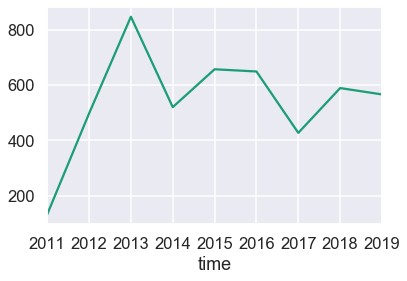

In [25]:
df_ps_neg.resample('A')['compound'].count().plot()

### Total number of Pos Tweets (threshhold 0.5)

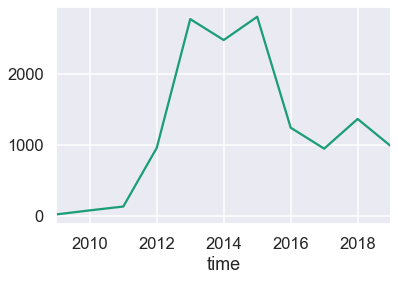

In [26]:
df_ps_pos.resample('A')['compound'].count().plot()

### Percentage of Hate Tweets

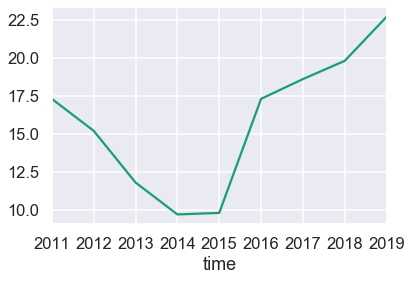

In [27]:
# Percentage of hate speech
neg = pd.DataFrame(df_ps_neg.resample('A')['compound'].count())
_all_ = df_ps.resample('A')['compound'].count()
per = neg.merge(_all_, left_index=True, right_index=True)
per.columns = ['neg', 'all']
per['Neg Margin'] = round(per['neg'] / per['all'] * 100, 1)
per['Neg Margin'].plot()

In [28]:
per

,neg,all,Neg Margin
time,,,
2011-12-31,132,763,17.3
2012-12-31,497,3262,15.2
2013-12-31,847,7180,11.8
2014-12-31,520,5334,9.7
2015-12-31,657,6710,9.8
2016-12-31,649,3742,17.3
2017-12-31,427,2290,18.6
2018-12-31,589,2979,19.8
2019-12-31,566,2492,22.7


### Hate intensity (no threshold)

In [29]:
int_ = df.merge(df_sent, left_on='text', right_on='headline')
int_ = int_[['time', 'compound', 'text']].copy()
int_.index = int_['time']
int_ = int_[int_['compound']<0]

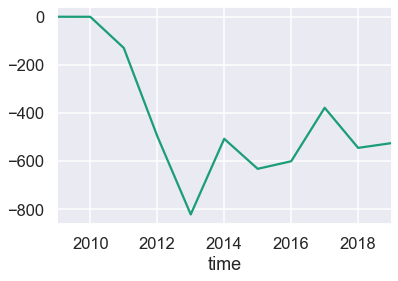

In [30]:
int_.resample('A')['compound'].sum().plot()

### Hate time of day?

In [31]:
time = df.merge(df_sent, left_on='text', right_on='headline')
time = time[['time', 'compound', 'text']].copy()
#Time stamp adjustment
#http://www.trumptwitterarchive.com/about (time stamps), assupmtion. EST which is -5 hours.
def timeminus5(elem):
    return elem  - timedelta(hours=5)
time['time'] = time['time'].apply(timeminus5)
time.index = time['time']

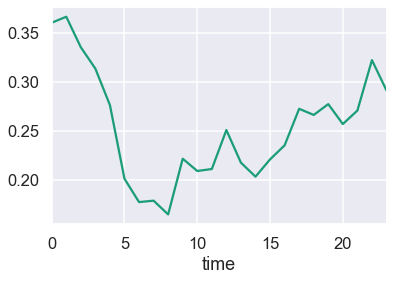

In [32]:
time['compound'].groupby(time['compound'].index.hour).mean().plot()


### Hate time of weekday?

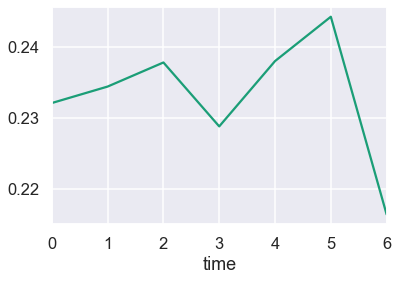

In [33]:
#0 = Monday
time['compound'].groupby(time['compound'].index.weekday).mean().plot()

### Hate Month

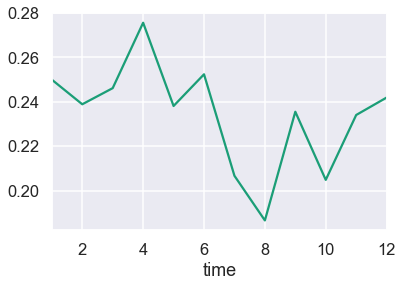

In [34]:
time['compound'].groupby(time['compound'].index.month).mean().plot()